# Notebook for the figures of Restrepo et al. 2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#library where the volume fraction or air due to rain is computed
import bin.rain as rain

%matplotlib inline
plt.rcParams["font.family"] = "serif"

### Figure 1

In [7]:
nu_w = rain.nu_w
nu_a = rain.nu_a

# Effective diffusion as a function of void fraction
theta= np.arange(0,0.05,0.01)
k__r = 1. / (1 - theta*(1 - nu_w/nu_a))

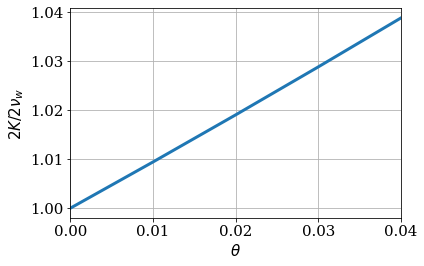

In [46]:
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['figure.figsize'] = (6, 3.8)

plt.plot(theta,k__r, linewidth=3)
plt.xlim([0,0.04])

plt.grid()
plt.xlabel(r"$\theta$", fontsize=15)
plt.ylabel(r"$2K/2\nu_w$", fontsize=15)
plt.tight_layout()
plt.savefig('fig1.png')

In [14]:
# computation of void fraction as a function of rain rate
# Rain rate
RR = np.arange(10, 210, 10)

Theta_1= np.zeros(RR.shape)
Theta_2= np.zeros(RR.shape)


dr = 0.1

#radius of the considered rain drops in mm
r = np.arange(2.2/ 2 , 4.6 / 2, dr)
# conversion to the radius of bubbles
r_b = rain.f(r)

for (R, i) in zip(RR, range(RR.shape[0])):
    Ni = np.zeros(r.shape)
    Ni2 =  np.zeros(r.shape)
    for (ri, j) in zip(r, range(r.shape[0])):
        
        # Computations for two modulation factors
        Ni[j] = rain.N(ri, R, rain.mu_a, rain.mu_w,
                       rain.g, rain.rho_w, mod = .1) *(4./3)*np.pi*(r_b[j]*10**(-3))**3     

        # Computations for two modulation factors
        Ni2[j] = rain.N(ri, R, rain.mu_a, rain.mu_w,
                       rain.g, rain.rho_w, mod = 1.) *(4./3)*np.pi*(r_b[j]*10**(-3))**3
        
    Theta_1[i] = np.sum(Ni)*dr
    Theta_2[i] = np.sum(Ni2)*dr

    

In [28]:
# Computation of the effective kinematic viscosity 

k_e = rain.nu_w / (1 - Theta_1*(1 - rain.nu_w/rain.nu_a))
k_e2 = rain.nu_w / (1 - Theta_2*(1 - rain.nu_w/rain.nu_a))

# With modified air density according to orders of magnitude of Harrison and Verron (2017)
nu_ah = 10**(-4) 

k_eh = rain.nu_w / (1 - Theta_1*(1 - rain.nu_w/nu_ah))

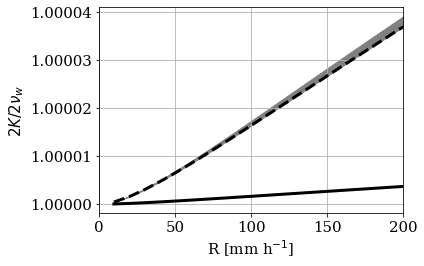

In [34]:
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['figure.figsize'] = (6, 3.8)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(RR, (k_e/nu_w), 'k--', linewidth=3)
ax1.plot(RR, k_e2/nu_w, 'k-', linewidth=3)

ax1.fill_between(RR, (k_e/nu_w),  k_eh/nu_w, color='grey')
ax1.set_xlim([0,200])


ax1.set_xlabel(r'R [mm h$^{-1}$]', fontsize = 15)
ax1.set_ylabel(r'$2K/2\nu_w$', fontsize = 15 )

ax1 = plt.gca()
ax1.ticklabel_format(useOffset=False)
ax1.grid()
plt.tight_layout()

plt.savefig("fig3.png")

## Comparison to table II of Medwin et al. 1992

differences arise from the difference in $dr$ with respect to Medwin et al. ( In Medwin et al., dr is not constant to 0.1 near the end of the table)

In [45]:
# Compute the volume contribution (source term) for heavy rain 
# and compare with Table II in Medwin et al.
R = 92
dr = .1
r_r = np.round(np.arange(2.3 , 4.6, dr), decimals=1)/2
r = rain.f(r_r)

print('drop diameter (mm)   DRD  bubble radius:   perc    vol. contrib (cm3 m-2 s-1)')

for i in range(r.shape[0]):
    print(r_r[i] * 2 , dr * rain.DRD(r_r, R, rain.mu_a, rain.g, rain.rho_w)[i], r[i],
           np.polyval(np.load('drop.npy'), 2 * r_r)[i]*100, 
           (4./3)*np.pi*(r[i] *10**(-1))**3 * np.polyval(np.load('drop.npy'), 2 * r_r)[i] * 
           rain.DRD(r_r, R, rain.mu_a, rain.g, rain.rho_w)[i] * dr )

print("total:",
       np.sum((4./3)*np.pi*(r*10**(-1))**3 *
              np.polyval(np.load('drop.npy'), 2 * r_r) * rain.DRD(r_r, R, rain.mu_a, rain.g, 
                                                                  rain.rho_w))*dr)

drop diameter (mm)   DRD  bubble radius:   perc    vol. contrib (cm3 m-2 s-1)
2.3 294.99900700583623 0.23635805575845095 5.133306530186315 0.0008375632020497757
2.4 257.5568682968585 0.2669607544873745 9.828398815627986 0.0020173756713992223
2.5 224.4793473124965 0.29981549815498154 14.621392520609778 0.00370523683408123
2.6 195.33820882678435 0.3349368145528234 19.459533723444906 0.0059826954694794715
2.7 169.7291316666645 0.3723288776309618 24.29006850244665 0.008913615612626232
2.8 147.27519480731937 0.41198536477197123 29.060242935928137 0.012536110785365913
2.9 127.62861640647128 0.45388940489047347 33.71730310220269 0.016855422225127276
3.0 110.471217147867 0.4980136208853576 38.20849507958349 0.021838426525453928
3.1 95.51397315433354 0.5443202683238642 42.48106494638376 0.02741034070967612
3.2 82.49593946845675 0.5927614705044173 46.4822587809168 0.033454019554649786
3.3 71.18275842192955 0.6432795482760179 50.159322661495686 0.039812029612768945
3.4 61.36491466242267 0.6958074